<a href="https://colab.research.google.com/github/rb4050/Deep-learning/blob/main/Regression_model_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression in keras


Make use of GPU runtime

in runtime -> change runtime type -> T4 Gpu

# Step 1 = Data ingestion

In [1]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [2]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Target feature is PE = power plant energy in MW
1. At = atmospheric temp deg cel
2. V = vaccum press of boiler
3. Ap = atmos pre
4. Rh = relattive humidity

# step 2 = data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

# step 3 = sep x and y(PE)

In [7]:
x = df.drop(columns=["PE"])
y = df["PE"]

In [8]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [9]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# step 4  = apply preprocesssing on x

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [12]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


# step 5 = train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [15]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [16]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [17]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [18]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [19]:
xtrain.shape

(7621, 4)

In [20]:
xtest.shape

(1906, 4)

In [21]:
ytrain.shape

(7621,)

In [22]:
ytest.shape

(1906,)

# step 6 = build neural netwrok with keras

In [23]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [24]:
model = Sequential(
    [
        Input(shape= (xtrain.shape[1],)),
        Dense(8,activation="relu"),
        Dense(4,activation="relu"),
        Dense(1,activation="linear")
    ]

)

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

# compile model

In [26]:
model.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [27]:
hist = model.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 206844.2656 - mae: 454.4877 - val_loss: 204232.8125 - val_mae: 451.5892
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 203854.3906 - mae: 451.1684 - val_loss: 196570.4375 - val_mae: 442.9533
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 193863.5469 - mae: 439.8398 - val_loss: 176424.3438 - val_mae: 419.3062
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 170669.9531 - mae: 412.1804 - val_loss: 142828.5156 - val_mae: 376.0735
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134482.2344 - mae: 364.2227 - val_loss: 101713.7969 - val_mae: 313.7070
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 94753.1797 - mae: 301.3179 - val_loss: 63759.6641 - val_mae: 239.2223
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58788.5078 - mae: 227.9716 - val_loss: 37767.7305 - val_mae: 173.2914
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34958.9766 

In [28]:
import matplotlib.pyplot as plt


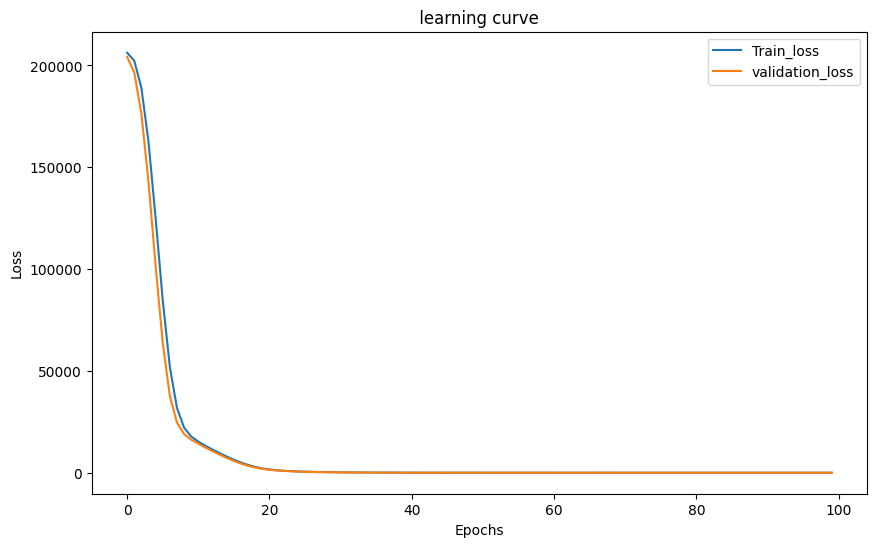

In [30]:
plt.figure(figsize=(10,6))
plt.plot(hist.history["loss"],label="Train_loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(" learning curve ")
plt.legend()
plt.show()

## model trained properly as train and val loss curves are moving together

# model evaluation

In [31]:
model.evaluate(xtrain,ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.7672 - mae: 3.5882


[20.877756118774414, 3.5729801654815674]

In [32]:
model.evaluate(xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9278 - mae: 3.4626


[20.425390243530273, 3.56099534034729]

In [35]:
from sklearn.metrics import (
    root_mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

)

In [45]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [46]:

print("Training Results")
evaluate_model(model, xtrain, ytrain)

Training Results
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.57
MAE : 3.57
MAPE : 0.79%
R2 : 92.74%


In [47]:
print("Testing Results")
evaluate_model(model, xtest, ytest)

Testing Results
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE : 4.52
MAE : 3.56
MAPE : 0.78%
R2 : 93.23%


In [36]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [37]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [38]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [41]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [44]:
preds = model.predict(xnew_pre)
preds[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[445.37012],
       [438.1003 ],
       [429.7985 ],
       [439.63873],
       [474.43494]], dtype=float32)

In [48]:
xnew["PE_pred"] = preds


In [49]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.370117
1,28.88,54.89,1007.16,46.60,438.100311
2,27.89,73.21,1001.32,85.88,429.798492
3,25.69,62.26,1011.38,74.08,439.638733
4,12.16,40.81,1025.79,70.97,474.434937
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.633301
96,11.78,39.96,1011.37,82.95,472.275513
97,5.62,41.38,1020.91,86.21,485.040527
98,24.96,74.99,1008.25,80.52,436.750305


In [52]:
xnew = xnew.round(2)


In [53]:
xnew.to_csv("RegResults.csv", index=False)


# Save model and preprocessor


In [54]:

import joblib
joblib.dump(num_pipe, "regpre.joblib")

['regpre.joblib']

In [55]:
model.save("regmodel.keras")


# Load preprocessor and model


In [56]:
p = joblib.load("regpre.joblib")


In [57]:
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [58]:
from keras.models import load_model


In [59]:
m = load_model("regmodel.keras")


In [60]:
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)